In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

Project Description

You work for the online store which sells computer games worldwide. Historical data on game sales, user and expert ratings, genres, and platforms (e.g., Xbox or PlayStation) are available from open sources. You need to identify patterns that determine a game's success. This will help you focus on potentially popular products and plan marketing campaigns.

You have data up to 2016. Assume it is December 2016, and you are planning a campaign for 2017. 

The dataset includes the acronym ESRB (Entertainment Software Rating Board) — an association that defines the age rating of computer games. The ESRB assesses game content and assigns an appropriate age category, such as "Adults," "Early Childhood," or "Teen."

Project Instructions

Step 1: Open the Data File and Review General Information


Step 2: Prepare the Data


Step 3: Conduct Exploratory Data Analysis

Examine how many games were released in different years. Are the data from all periods important?
Analyze how sales changed across platforms. Choose platforms with the highest total sales and plot the distribution over the years. What is the typical lifespan of new and old platforms?
Take data for the relevant current period. Determine the relevant period based on the results of the previous questions. The main factor is that this data will help build a forecast for 2017.
Do not consider data from previous years in your analysis.
Which platforms are leading in sales, growing, or declining? Select a few potentially profitable platforms.
Plot a box plot of global game sales by platform. Describe the result.
Examine how user and critic reviews influence sales within a popular platform. Create a scatter plot and calculate the correlation between reviews and sales. Formulate conclusions.
Relate your findings to game sales on other platforms.
Review the overall distribution of games by genre. What can be said about the most profitable genres? Are there genres with high and low sales?

Step 4: Create a User Profile for Each Region

Identify for each region (NA, EU, JP):
The top 5 most popular platforms. Describe differences in sales shares.
The top 5 most popular genres. Explain the differences.
Does the ESRB rating affect sales in the specific region?

Step 5: Test Hypotheses

1) The average user ratings for Xbox One and PC platforms are the same.
2) The average user ratings for Action (English: "action") and Sports (English: "sports competitions") genres are different.

## Read data

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


We will be working with a dataset of games sold on various platforms in North America, Europe, and Japan from 1980 to 2016.

## Data preparation

### Colnames unification

In [3]:
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Data type convertion

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Let's change the data types in two columns:

The  year_of_release is better represented as an integer — there's no particular reason to use the datetime format since we don't have data on days and months, and strings aren't appropriate in this context.

The user_score should be converted to a float, to align it with the format used for critic scores and sales. It's clear that we'll need to perform arithmetic operations with this variable in the future.

In [5]:
data['year_of_release'] = data['year_of_release'].astype('Int32')
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce').astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int32(1), float64(6), object(4)
memory usage: 1.4+ MB


### Handling nans

In [6]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

I don't think we should fill in the missing values in columns like game title, release year, scores, and ratings — these data can't be reasonably inferred based on other games. For example, a score could be either very high or very low, and any method for filling in the gaps would result in something averaged (mean/median), which, given the number of missing values, could significantly skew the analysis.

The missing data likely resulted from the imperfection of the parser used to compile the table. Given the number of missing scores and ratings, it's possible that the data was parsed from two different sources, where fields like ratings and scores might have been named differently.

The abbreviation "tbd" usually stands for "To Be Determined" — since we can't extract meaningful information from such values, we'll treat them as NaN.

### Total revenue calculation

In [7]:
data['total_revenue'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_revenue
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [8]:
#no full duplicates found
data.duplicated().sum()

0

In [9]:
data.genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [10]:
len(data['platform'].unique())

31

In [11]:
#there are 11,599 unique game titles.
#It's not realistic to manually check them for duplicates by eye.
data.name.value_counts().sort_values()

Final Fantasy I & II            1
Jampack Volume 14 (RP-T)        1
Automobili Lamborghini          1
Ontamarama                      1
Forever Kingdom                 1
                               ..
FIFA 14                         9
Ratatouille                     9
Madden NFL 07                   9
LEGO Marvel Super Heroes        9
Need for Speed: Most Wanted    12
Name: name, Length: 11559, dtype: int64

## Exploratory data analysis

In [24]:
data['year_of_release'].value_counts().sort_index()

1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64

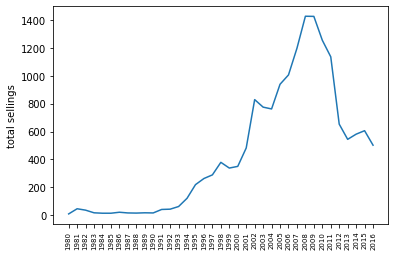

In [36]:
plt.plot(range(data['year_of_release'].value_counts().shape[0]), 
         data['year_of_release'].value_counts().sort_index().tolist())
plt.xticks(range(data['year_of_release'].value_counts().shape[0]), 
           data['year_of_release'].value_counts().sort_index().index, rotation=90, size=7)
plt.ylabel('total sellings')
plt.show()

In [37]:
data['year_of_release'].value_counts().sum()*0.05

822.3000000000001

In [38]:
c = 0

for year, count in data['year_of_release'].value_counts().sort_values().iteritems():
    c += count
    if c >= data['year_of_release'].value_counts().sum()*0.05:
        print(f'The relevant period for analysis begins in {year}')
        break

Актуальный период для анализа начинается с 1996 года


Until 1993, fewer than 100 games were released per year, and until 1996, fewer than 20 games per year. We can safely remove data for the years in which less than 5% of the total analyzed games (822 games) were released (see code above). In our case, it makes sense to start the analysis from 1996.

In [39]:
data['platform'].value_counts().sort_values()

GG         1
PCFX       1
TG16       2
3DO        3
WS         6
SCD        6
NG        12
GEN       29
DC        52
NES       98
GB        98
2600     133
WiiU     147
SAT      173
SNES     239
XOne     247
N64      319
PS4      392
PSV      430
3DS      520
GC       556
GBA      822
XB       824
PC       974
PS      1197
PSP     1209
X360    1262
Wii     1320
PS3     1331
DS      2151
PS2     2161
Name: platform, dtype: int64

Let's build sales statistics by year for all platforms with more than 1,000 total sales per year:

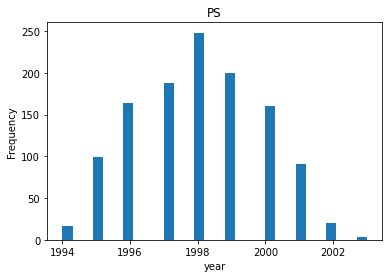

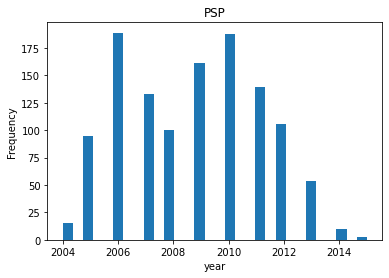

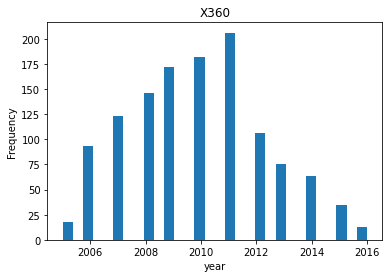

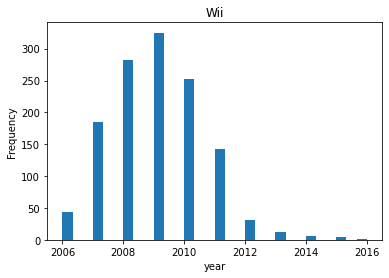

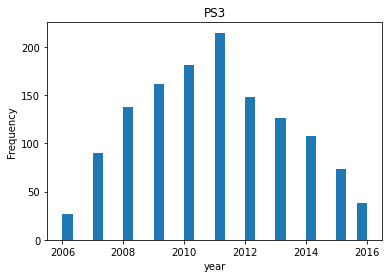

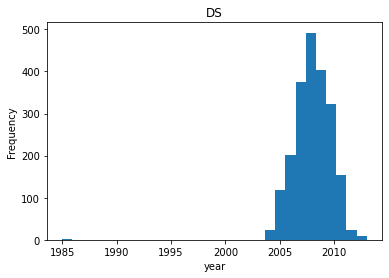

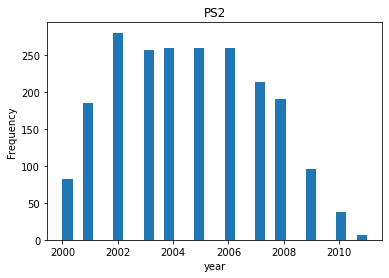

In [40]:
for platform, count in data['platform'].value_counts().sort_values().iteritems():
    if count > 1000:
        d = data.query('platform == @platform')
        d['year_of_release'].plot.hist(bins = 30)
        plt.title(platform)
        plt.xlabel('year')
        plt.show()

Conclusion: Seven platforms lead in game sales. Sales on these platforms have a distribution close to normal, with a peak in sales occurring around the 5th year of their existence. New platforms emerge and old ones disappear, on average, every 10 years.

We are interested only in platforms that are likely to still exist in 2017 and games released after 1996. Given that the average lifespan of major platforms is around 10 years and the industry evolves rapidly with trends changing every 2-3 years, we will filter out games released before 2013.

In [41]:
data.shape

(16715, 12)

In [42]:
data = data[data['year_of_release'] >= 2013]
data.shape

(2233, 12)

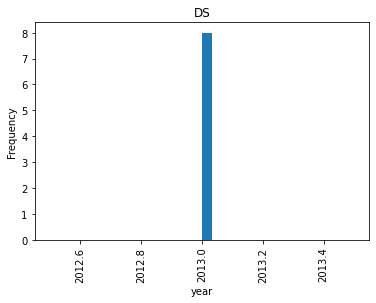

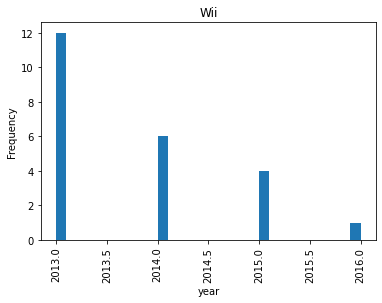

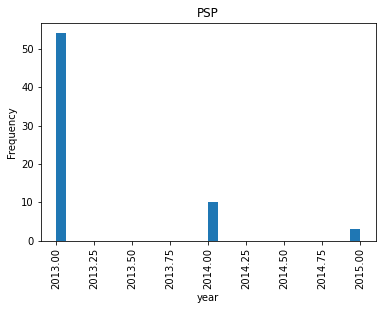

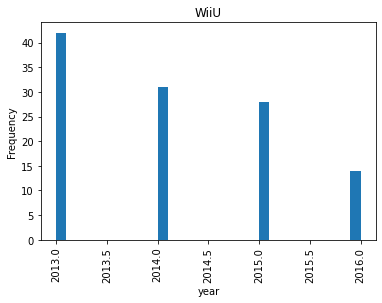

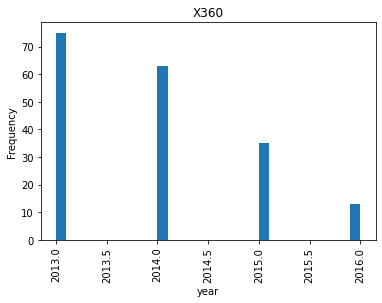

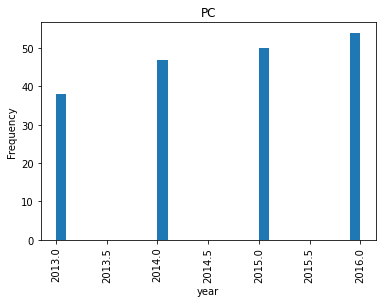

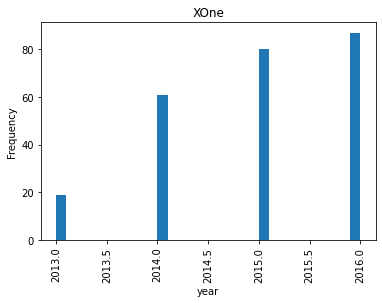

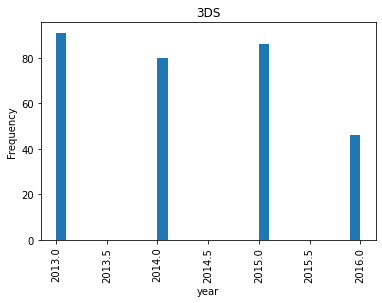

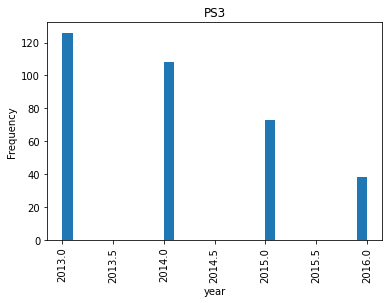

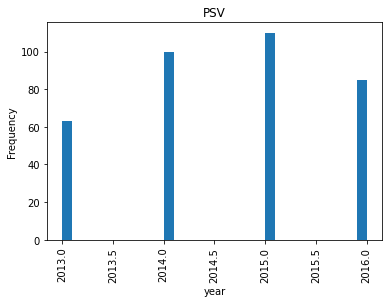

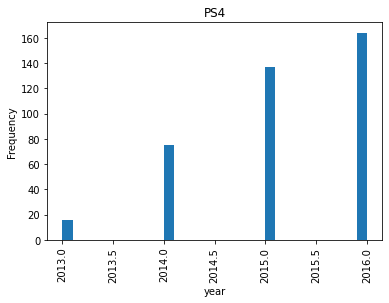

In [43]:
for platform, count in data['platform'].value_counts().sort_values().iteritems():
    d = data.query('platform == @platform')
    d['year_of_release'].plot.hist(bins = 30)
    plt.title(platform)
    plt.xticks(rotation=90)
    plt.xlabel('year')
    plt.show()

I identified the following potentially profitable platforms:

PS4: Sales are increasing.
XOne: Sales are rising.
PSV: Sales have been growing since 2013 and seem to have peaked in 2015.
3DS: Sales are significant.
PC: Sales are relatively low but evenly distributed since 2013.

In [44]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_revenue
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


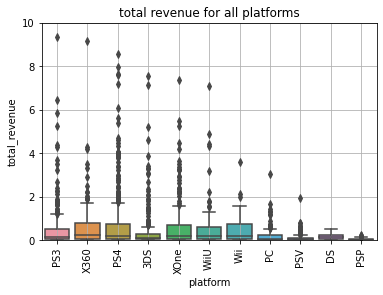

In [47]:
sns.boxplot(x = 'platform', y = 'total_revenue', data=data)

plt.grid(True)
plt.xticks(rotation=90)
plt.ylim(0, 10)
plt.title('total revenue for all platforms')
plt.show()

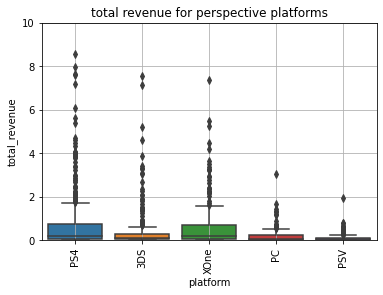

In [48]:
sns.boxplot(x = 'platform', y = 'total_revenue', data=data[data['platform'].isin(['PS4', 'XOne', 'PSV', '3DS', 'PC'])])

plt.grid(True)
plt.xticks(rotation=90)
plt.ylim(0, 10)
plt.title('total revenue for perspective platforms')
plt.show()

The boxplot reveals that the highest sales are on platforms such as Wii, X360, PS3, and DS, while the lowest sales are on XB, GC, and DC. Notably, the GBA platform has the most uniform sales, with no outliers beyond the whiskers, whereas other platforms have many games with exceptionally high sales that can be considered outliers.

Let's take a closer look at the example of one of the potentially promising platforms, PS4:

In [49]:
d = data.query('platform == "PS4"')
d.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_revenue
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


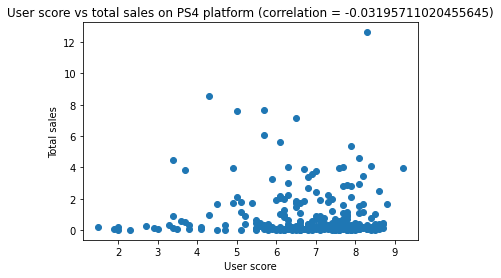

In [50]:
c = st.pearsonr(d.dropna(subset = ['user_score'])['user_score'], d.dropna(subset = ['user_score'])['total_revenue']).statistic

plt.scatter(d['user_score'], d['total_revenue'])
plt.title(f'User score vs total sales on PS4 platform (correlation = {c})')
plt.xlabel('User score')
plt.ylabel('Total sales')
plt.show()

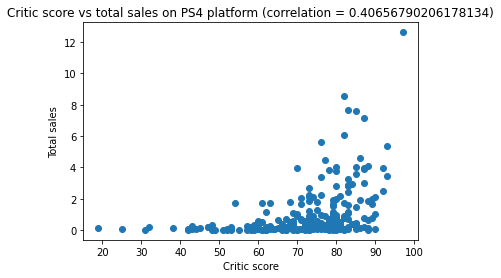

In [51]:
c = st.pearsonr(d.dropna(subset = ['critic_score'])['critic_score'], d.dropna(subset = ['critic_score'])['total_revenue']).statistic

plt.scatter(d['critic_score'], d['total_revenue'])
plt.title(f'Critic score vs total sales on PS4 platform (correlation = {c})')
plt.xlabel('Critic score')
plt.ylabel('Total sales')
plt.show()

Conclusion: User ratings have little to no impact on sales, whereas critic ratings have a moderate influence on sales, with a correlation coefficient of 0.4.

In [52]:
for platform, d in data.groupby('platform'):
    try:
        u = st.pearsonr(d.dropna(subset = ['user_score'])['user_score'], d.dropna(subset = ['user_score'])['total_revenue']).statistic
        c = st.pearsonr(d.dropna(subset = ['critic_score'])['critic_score'], d.dropna(subset = ['critic_score'])['total_revenue']).statistic
        print(f'''For {platform} platform, the correlation between user score and sales = {np.round(u, 3)}; 
        the correlation between critics score and sales = {np.round(c, 3)}\n''')
    except Exception:
        print(f'Data is not sufficient for platform {platform}\n')
        continue

For 3DS platform, the correlation between user score and sales = 0.242; 
        the correlation between critics score and sales = 0.357

Data is not sufficient for platform DS

For PC platform, the correlation between user score and sales = -0.094; 
        the correlation between critics score and sales = 0.196

For PS3 platform, the correlation between user score and sales = 0.002; 
        the correlation between critics score and sales = 0.334

For PS4 platform, the correlation between user score and sales = -0.032; 
        the correlation between critics score and sales = 0.407

Data is not sufficient for platform PSP

For PSV platform, the correlation between user score and sales = 0.001; 
        the correlation between critics score and sales = 0.255

Data is not sufficient for platform Wii

For WiiU platform, the correlation between user score and sales = 0.419; 
        the correlation between critics score and sales = 0.376

For X360 platform, the correlation between user 

Conclusion: Overall, there is a trend indicating that critic ratings have a greater impact on sales than user ratings. The only exception to this rule is the WiiU platform.

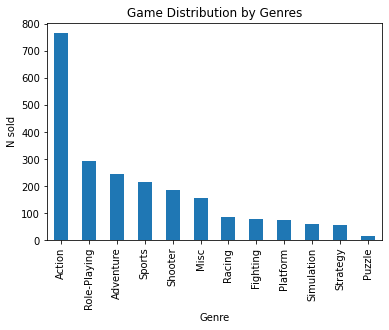

In [53]:
data['genre'].value_counts().plot(kind = 'bar')
plt.title('Game Distribution by Genres')
plt.xlabel('Genre')
plt.ylabel('N sold')
plt.show()

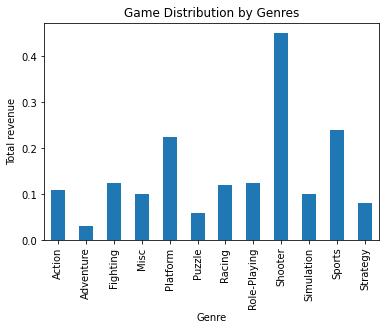

In [56]:
data.groupby('genre')['total_revenue'].median().plot(kind = 'bar')
plt.title('Game Distribution by Genres')
plt.xlabel('Genre')
plt.ylabel('Total revenue')
plt.show()

The genre with the highest number of games produced is Action, by a significant margin.

The genres with the fewest games produced are Fighting, Strategy, and Puzzle.

The highest median revenue is observed in the Shooter and Sports genres.

The lowest median revenue is found in the Adventure and Puzzle genres.

## Users portrait by region

In [57]:
platform_sales = data.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()

na_sales: 
platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64


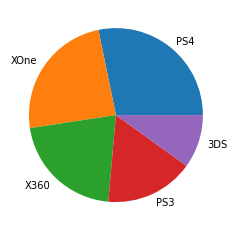


eu_sales: 
platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64


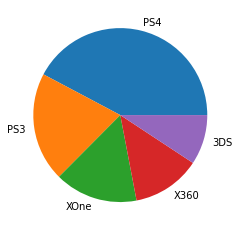


jp_sales: 
platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64


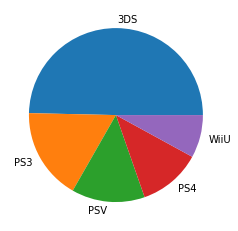

In [58]:
for s in ['na_sales', 'eu_sales', 'jp_sales']:
    print(f'{s}: ')
    print(platform_sales[s].sort_values(ascending = False)[:5])
    plt.pie(platform_sales[s].sort_values(ascending = False)[:5], 
            labels = platform_sales[s].sort_values(ascending = False)[:5].index)
    plt.show()
    print()

In Japan, sales on the top 5 platforms are distributed less evenly compared to Europe and North America.
In America and Europe, the most popular games are on the PS4 platform, while in Japan, the DS platform is the most popular.

In [59]:
genre_sales = data.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()

na_sales: 
genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64


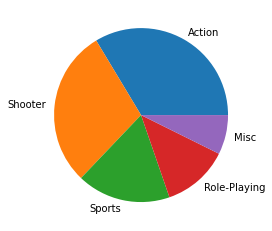


eu_sales: 
genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64


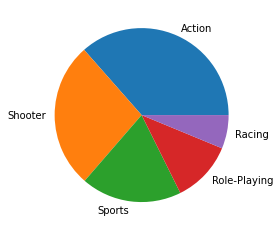


jp_sales: 
genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64


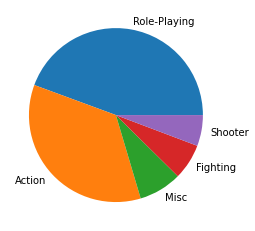

In [60]:
for s in ['na_sales', 'eu_sales', 'jp_sales']:
    print(f'{s}: ')
    print(genre_sales[s].sort_values(ascending = False)[:5])
    plt.pie(genre_sales[s].sort_values(ascending = False)[:5], 
            labels = genre_sales[s].sort_values(ascending = False)[:5].index)
    plt.show()
    print()

In Europe and America, the most popular genre is Action.
In Japan, Role Playing is the overwhelmingly most popular genre.
The Racing genre is popular only in Europe.

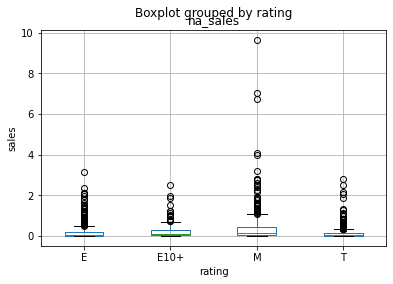

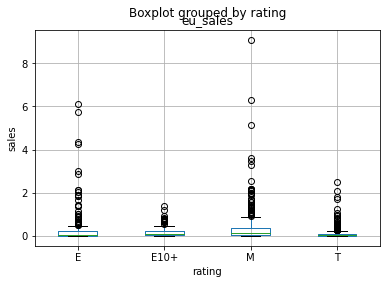

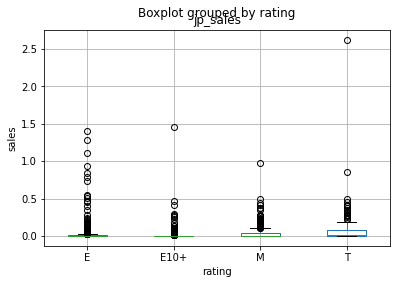

In [62]:
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    data.boxplot(column = region, by = 'rating')
    plt.ylabel('sales')
    plt.show()

Conclusion:

ESRB Ratings do influence sales across regions.

Games with an E10+ (Everyone older than 10) rating tend to sell the worst, likely because these are often children's games, and parents generally buy games for themselves.

In America and Europe, games with an Mature rating sell the best, whereas in Japan, games with an Everyone rating are the most popular.

## Hypothesis testing

Hypothesis: The average user ratings for the Xbox One and PC platforms are the same.

H0: The average user ratings for the Xbox One and PC platforms are the same.

H1: The average user ratings for the Xbox One and PC platforms are different in either direction.

To address this, it makes sense to use the two-sided independent t-test (st.ttest_ind) since we are not concerned with the direction of the difference in average ratings. We'll use the standard significance level of 5% for the p-value.

In [63]:
d = data.dropna(subset = ['user_score'])
t_stat, p_value = st.ttest_ind(d.query('platform == "XOne"')['user_score'], d.query('platform == "PC"')['user_score'], 
                              alternative='two-sided')

if p_value < .05:
    print(f'''Не отвергаем гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые; 
    p-value теста = {p_value}''')
else:
    print(f'''Отвергаем гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые; 
    p-value теста = {p_value}''')

Отвергаем гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые; 
    p-value теста = 0.14012658403611647


Hypothesis: The average user ratings for the Action and Sports genres are different.

H0: The average user ratings for the Action and Sports genres are the same.

H1: The average user ratings for the Action and Sports genres are different.

As in the previous case, we use the test for equality of means with a two-sided alternative hypothesis.

In [64]:
d = data.dropna(subset = ['user_score'])
t_stat, p_value = st.ttest_ind(d.query('genre == "Action"')['user_score'], d.query('genre == "Sports"')['user_score'], 
                              alternative='two-sided')

if p_value < .05:
    print(f'''Не отвергаем гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые; 
    p-value теста = {p_value}''')
else:
    print(f'''Отвергаем гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые; 
    p-value теста = {p_value}''')

Не отвергаем гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые; 
    p-value теста = 1.0517832389140023e-27


## Conclusion

The analysis of the video game industry data revealed several key insights:

It is important to note that since 1996, the number of games released has stabilized, allowing us to focus on this period for analysis and further narrow it down to 2013, considering the average lifespan of platforms and the rapid change in trends.

The top-selling platforms are XOne, PC, and PS4, with their success defined both by the number of games released and total sales volumes. However, there are differences in platform popularity and genre preferences between regions: while Action games are popular in Europe and America, Role Playing games dominate in Japan. Overall, consumer behavior in America and Europe is similar, while it differs significantly in Japan.

The analysis of the influence of the ESRB rating on sales revealed that game ratings impact user preferences: in North America and Europe, games with a Mature rating are more popular, whereas in Japan, games with an Everyone rating are more popular.

Hypothesis tests showed a statistical difference between the average user ratings for the Xbox One and PC platforms but did not show a statistical difference between the average user ratings for the Action and Sports genres.

These findings highlight the characteristics of the video game industry and the significance of regional preferences in choosing game platforms, genres, and ratings, which is potentially important for game promotion strategies in different parts of the world.